# Distributions
---

In this notebook, you'll learn about histograms and density plots. Visualising the distribution of data is essential to grasp valuable parameters such as frequencies, peaks, skewness, centre-ness, and modality.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

[Dataset](https://www.kaggle.com/arshid/iris-flower-dataset) used comprises dataset of 150 different flowers or 50 each from three different species of iris

In [2]:
iris_data = pd.read_csv('examples/iris.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Histograms

Let's say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the `sns.distplot` command:

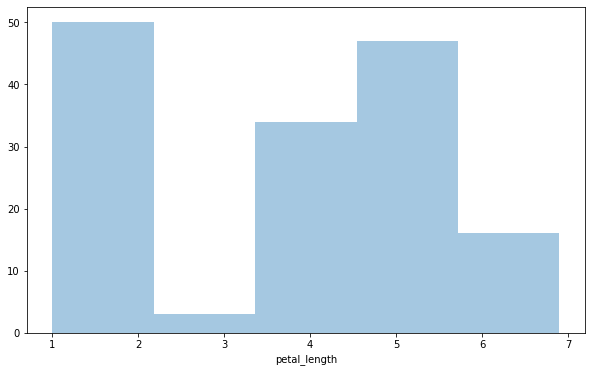

In [3]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

sns.distplot(a=iris_data['petal_length'], kde=False)
plt.show()

We customise the behaviour of the command with 2 additional parameters:
+ `a=` chooses the column we'd like to plot (in this case, we choose `petal_length`)
+ `kde=False` is something we'll always set when creating histograms as leaving it out will superimpose a KDE plot on top of the histogram. 

## Density Plots

The next type of plot is **kernal density estimate (KDE)** plot, which is like a smoothed histogram. 

To make a KDE plot, we use the `sns.kdeplot` command. Setting `shade=True` colours the area below the curve.

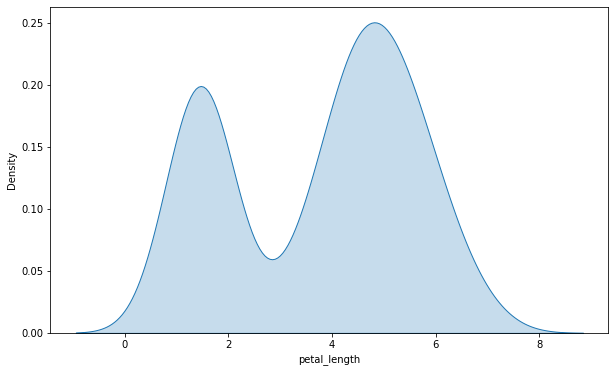

In [4]:
plt.figure(figsize=(10,6))

# KDE plot
sns.kdeplot(data=iris_data.petal_length, shade=True)
plt.show()

## 2D KDE plots

We're not restricted to a single column when it comes to creating a KDE plot. We can create a **two-dimensional (2D) KDE plot** with the `sns.jointplot` command.

In the plot below, the color-coding shows us how likely we are to see different combinations of sepal_width and petal_length, where darker parts are more likely

<Figure size 720x432 with 0 Axes>

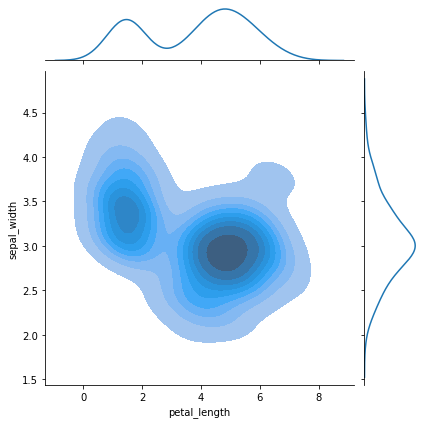

In [5]:
plt.figure(figsize=(10,6))

# 2D KDE plot
sns.jointplot(x=iris_data.petal_length, y=iris_data.sepal_width, kind='kde', shade=True)
plt.show()

## Boxplots

A boxplot is a graph that gives you a good indication of how the values in the data are spread out in a dataset. You can show a boxplot using the `sns.boxplot` command.

<img boxplot src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2091735%2Fddf7d73fc1028a59749fb2ec1c270341%2Fbox.png?generation=1587616733836881&alt=media" width="512" />

*source: kaggle.com*

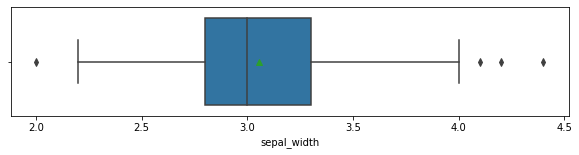

In [6]:
plt.figure(figsize=(10,2))

# box plot
sns.boxplot(iris_data.sepal_width, showmeans=True)
plt.show()

## Colour-coded Plots

We'll create plots to understand differences between the species, distinguished by their colours. To accomplish this, we first break the dataset into 3 separate subsets - one for each species

In [8]:
print(iris_data.species.value_counts())

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64


In [9]:
# splitting the data into 3 sets based on species
iris_set_data = iris_data[iris_data['species'] == 'Iris-setosa']
iris_ver_data = iris_data[iris_data['species'] == 'Iris-versicolor']
iris_vir_data = iris_data[iris_data['species'] == 'Iris-virginica']

In the example below, we create different histogram for each species by using the `sns.distplot` command three times. We use `label=` to set how each histogram will appear in the legend.

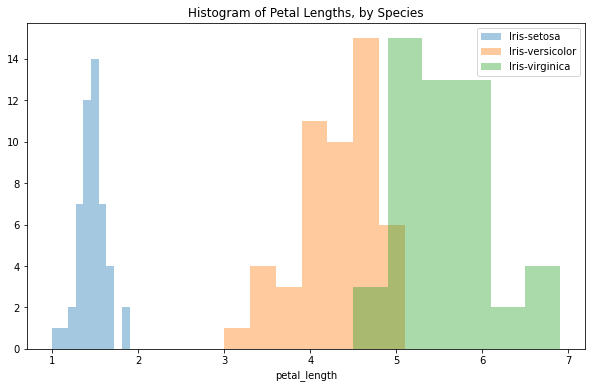

In [10]:
# plotting 3 histograms
plt.figure(figsize=(10,6))
sns.distplot(a=iris_set_data.petal_length, label='Iris-setosa', kde=False)
sns.distplot(a=iris_ver_data.petal_length, label='Iris-versicolor', kde=False)
sns.distplot(a=iris_vir_data.petal_length, label='Iris-virginica', kde=False)

plt.title('Histogram of Petal Lengths, by Species')

# force legend to show
plt.legend()
plt.show()

In this case, the legend does not automatically sppear on the plot. Ths we have to use `plt.legend()` to fore it to show (for any plot types).

We can create a KDE plot for each species as well using `sns.kdeplot`. Again, `label=` is used to set the values in the legend.

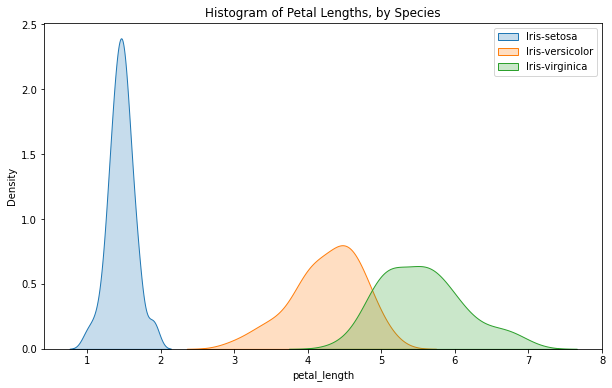

In [11]:
# KDE plots for each species
plt.figure(figsize=(10,6))
sns.kdeplot(data=iris_set_data.petal_length, label='Iris-setosa', shade=True)
sns.kdeplot(data=iris_ver_data.petal_length, label='Iris-versicolor', shade=True)
sns.kdeplot(data=iris_vir_data.petal_length, label='Iris-virginica', shade=True)

plt.title('Histogram of Petal Lengths, by Species')

# force legend to show
plt.legend()
plt.show()

Through the visualisation above, we can observe that *iris-versicolor* and *iris-virginica* seem to have similar values for petal length, whereas *iris-setosa* belongs in a category all by itself. 

Hence, based on this dataset, we might be able to classify any iris plant as *iris-setosa* based on its petal length; if the petal length of an iris flower is less than 2 cm, it's most likely to be *iris sentosa*

Next up, we'll learn more about [choosing plot types and custom styles](https://github.com/colintwh/visualisation/blob/master/chooseplots.ipynb)